# Prediction of Price
     1. Actual price of NEVs and conventional vehicles in the future market by manufacture
     
     2. The cost/save of driving in the future

In [103]:
import pandas as pd
import matplotlib.pylab as plt
import plotly.graph_objs as go
import plotly.express as px
import matplotlib
import numpy as np
from matplotlib.pyplot import figure

In [74]:
SAVE = '../Processed_Data/Save_money.csv'
Price = '../Processed_Data/Vehicle_Dataset.csv'

In [75]:
df_save = pd.read_csv(SAVE)
df_price = pd.read_csv(Price)

### Actual price of NEVs and conventional vehicles in the future market by manufacture

In [76]:
df_price

,Unnamed: 0,Maker,Genmodel,Year,Price,Gas_emission,Fuel_type,Engine_size
0,0,Abarth,124 spider,2016,29365,148,Petrol,1368
1,1,Abarth,124 spider,2016,31365,153,Petrol,1368
2,2,Abarth,124 spider,2017,29365,148,Petrol,1368
3,3,Abarth,124 spider,2017,31365,153,Petrol,1368
4,4,Abarth,124 spider,2017,26665,148,Petrol,1368
...,...,...,...,...,...,...,...,...
335557,335557,Volvo,Xc40,2018,35250,163,Petrol,1969
335558,335558,Volvo,Xc40,2018,36750,166,Petrol,1969
335559,335559,Volvo,Xc40,2018,29200,144,Petrol,1477
335560,335560,Volvo,Xc40,2018,33350,161,Petrol,1969


In [77]:
df_price['Fuel_type'] = df_price['Fuel_type'].replace('Diesel','Not_NE')
df_price['Fuel_type'] = df_price['Fuel_type'].replace('Petrol','Not_NE')
df_price['Fuel_type'] = df_price['Fuel_type'].replace('Other','NE')
df_price['Fuel_type'] = df_price['Fuel_type'].replace('Electric Diesel REX','NE')

In [78]:
df_price.drop(columns=['Unnamed: 0','Maker','Genmodel','Gas_emission','Engine_size'])

,Year,Price,Fuel_type
0,2016,29365,Not_NE
1,2016,31365,Not_NE
2,2017,29365,Not_NE
3,2017,31365,Not_NE
4,2017,26665,Not_NE
...,...,...,...
335557,2018,35250,Not_NE
335558,2018,36750,Not_NE
335559,2018,29200,Not_NE
335560,2018,33350,Not_NE


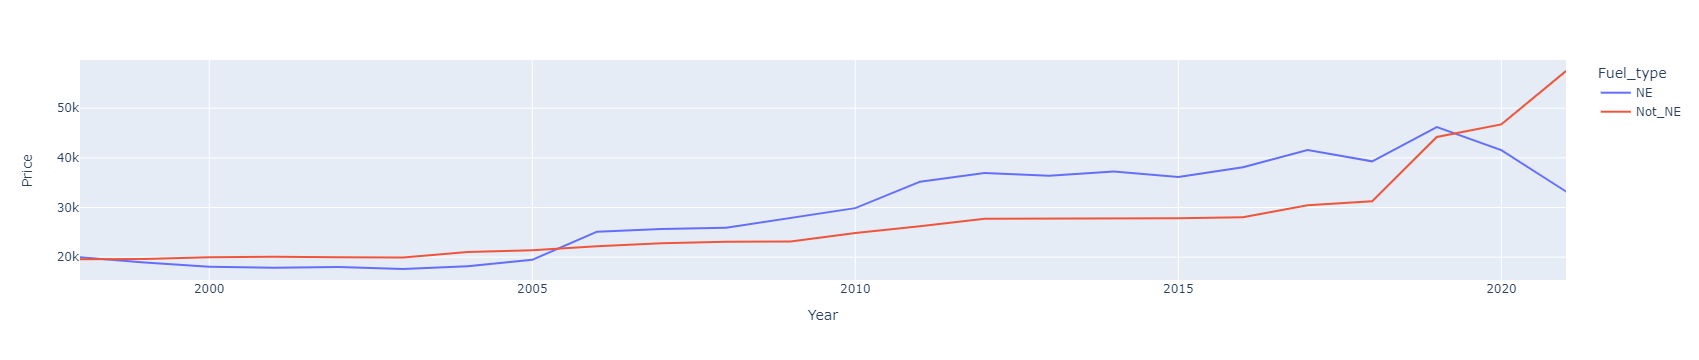

In [79]:
group = df_price.groupby(['Year','Fuel_type']).agg({'Price': 'mean'})
group = group.reset_index()
fig = px.line(group, x="Year", y="Price", color='Fuel_type')
fig.show()

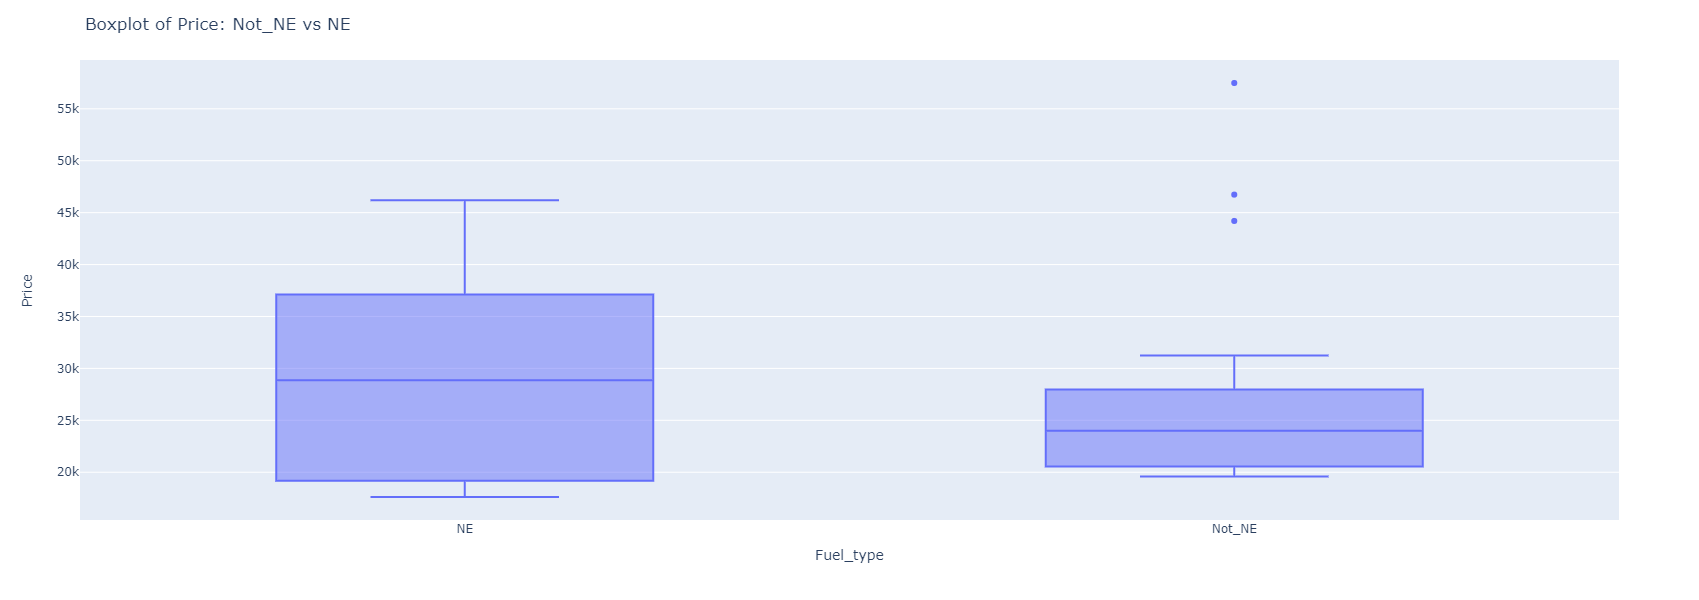

In [117]:
fig = px.box(group, x="Fuel_type", y="Price")
fig.layout.update(
    width=1000,
    height=600,
    title_text = 'Boxplot of Price: Not_NE vs NE')
fig.show()

### The cost/save of driving in the future

In [80]:
df_save = df_save.drop(columns=['Unnamed: 0'])

In [81]:
df_save.head()

,Year,Save_of_gas,Save_of_EV,Save_of_PHEV,Save_of_FCV,Avg_NE
0,2022.0,1065.789474,3134.375000,1437.500000,500.0,1690.625000
1,2021.0,1169.191919,4024.509804,1971.153846,900.0,2298.554550
2,2020.0,1159.793814,4269.736842,1972.222222,750.0,2330.653021
3,2019.0,947.867299,3857.142857,2337.500000,500.0,2231.547619
4,2018.0,920.704846,3656.250000,1815.217391,500.0,1990.489130


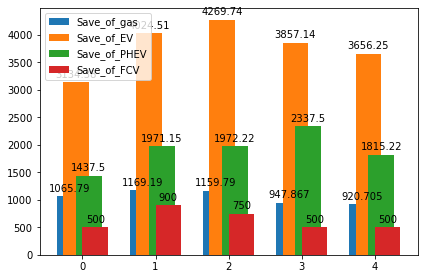

In [118]:
labels = ['2018','2019','2020','2021','2022']
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, df_save['Save_of_gas'], width, label='Save_of_gas')
rects2 = ax.bar(x - width/4, df_save['Save_of_EV'], width, label='Save_of_EV')
rects3 = ax.bar(x + width/4, df_save['Save_of_PHEV'], width, label='Save_of_PHEV')
rects4 = ax.bar(x + width/2, df_save['Save_of_FCV'], width, label='Save_of_FCV')
ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
ax.bar_label(rects3, padding=3)
ax.bar_label(rects4, padding=3)
fig.tight_layout()

ax.legend()

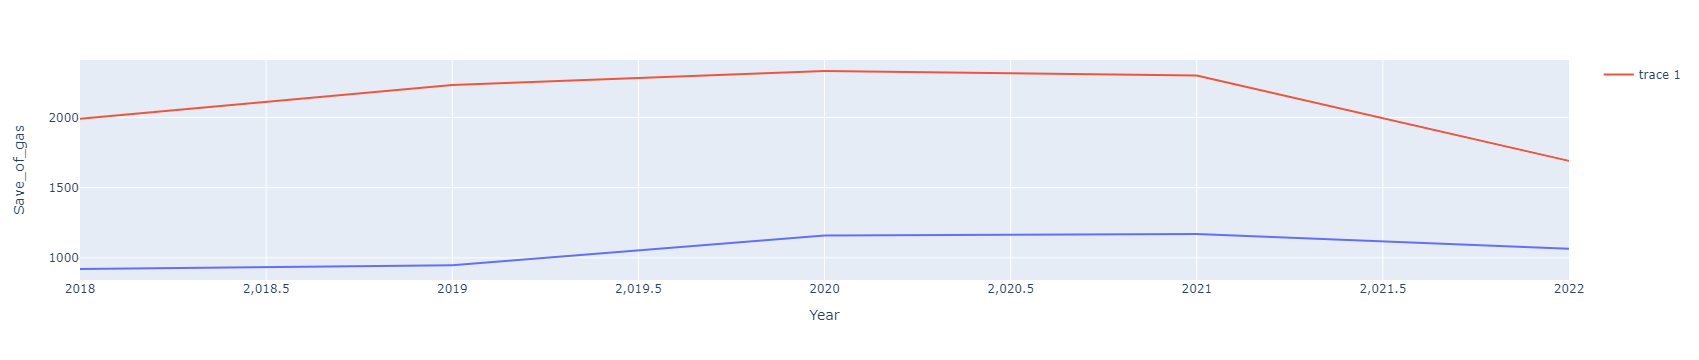

In [119]:
fig = px.line(df_save, x="Year", y='Save_of_gas')
fig.add_scatter(x=df_save['Year'], y=df_save['Avg_NE'], mode='lines')
fig.show()